In [20]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib as mplot
from scipy.stats import norm
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import math
import json
from collections import Counter

In [21]:
# https://www.netquest.com/blog/br/blog/br/qual-e-o-tamanho-de-amostra-que-preciso
# https://cavalcanteassociados.com.br/o-que-e-amostragem/
def ca3(ci, p, e, n):
    q = 1 - p
#     z = 1.645
    z = norm.ppf(ci + (1-ci)/2)
    a = z**2*p*q*n
    b = (n-1)*e**2 + z**2 *p*q
    return a/b
        

In [22]:
def get_dodf_type(s, dbg=False, default='integra'):
    s = s.lower()
    if 'sup' in s:
        return 'suplemento'
    elif 'ext' in s or 'etx' in s or 'exr' in s:
        return 'extra'
    elif 'esp' in s:
        return 'especial'
    elif 'int' in s or 'sec' in s:
        return 'integra'
    else:
        if dbg:
            print("SEM CLASSE:", s, '| default: ', default)        
        return default

    
hierarquia_dodfs = json.load(open('hierarquia_dodfs.json'))
hierarquia_tipo = {k: get_dodf_type(k) for k in hierarquia_dodfs}
contador = Counter(hierarquia_tipo.values())

In [23]:
contador

Counter({'integra': 4646, 'suplemento': 283, 'extra': 558, 'especial': 2})

In [24]:
ci = .90
e = .05
INTEGRA = contador['integra']
p = .5

[0.05  0.055 0.06  0.065 0.07  0.075]
[0.85 0.9  0.95]
Fig saved at >>> integra.png


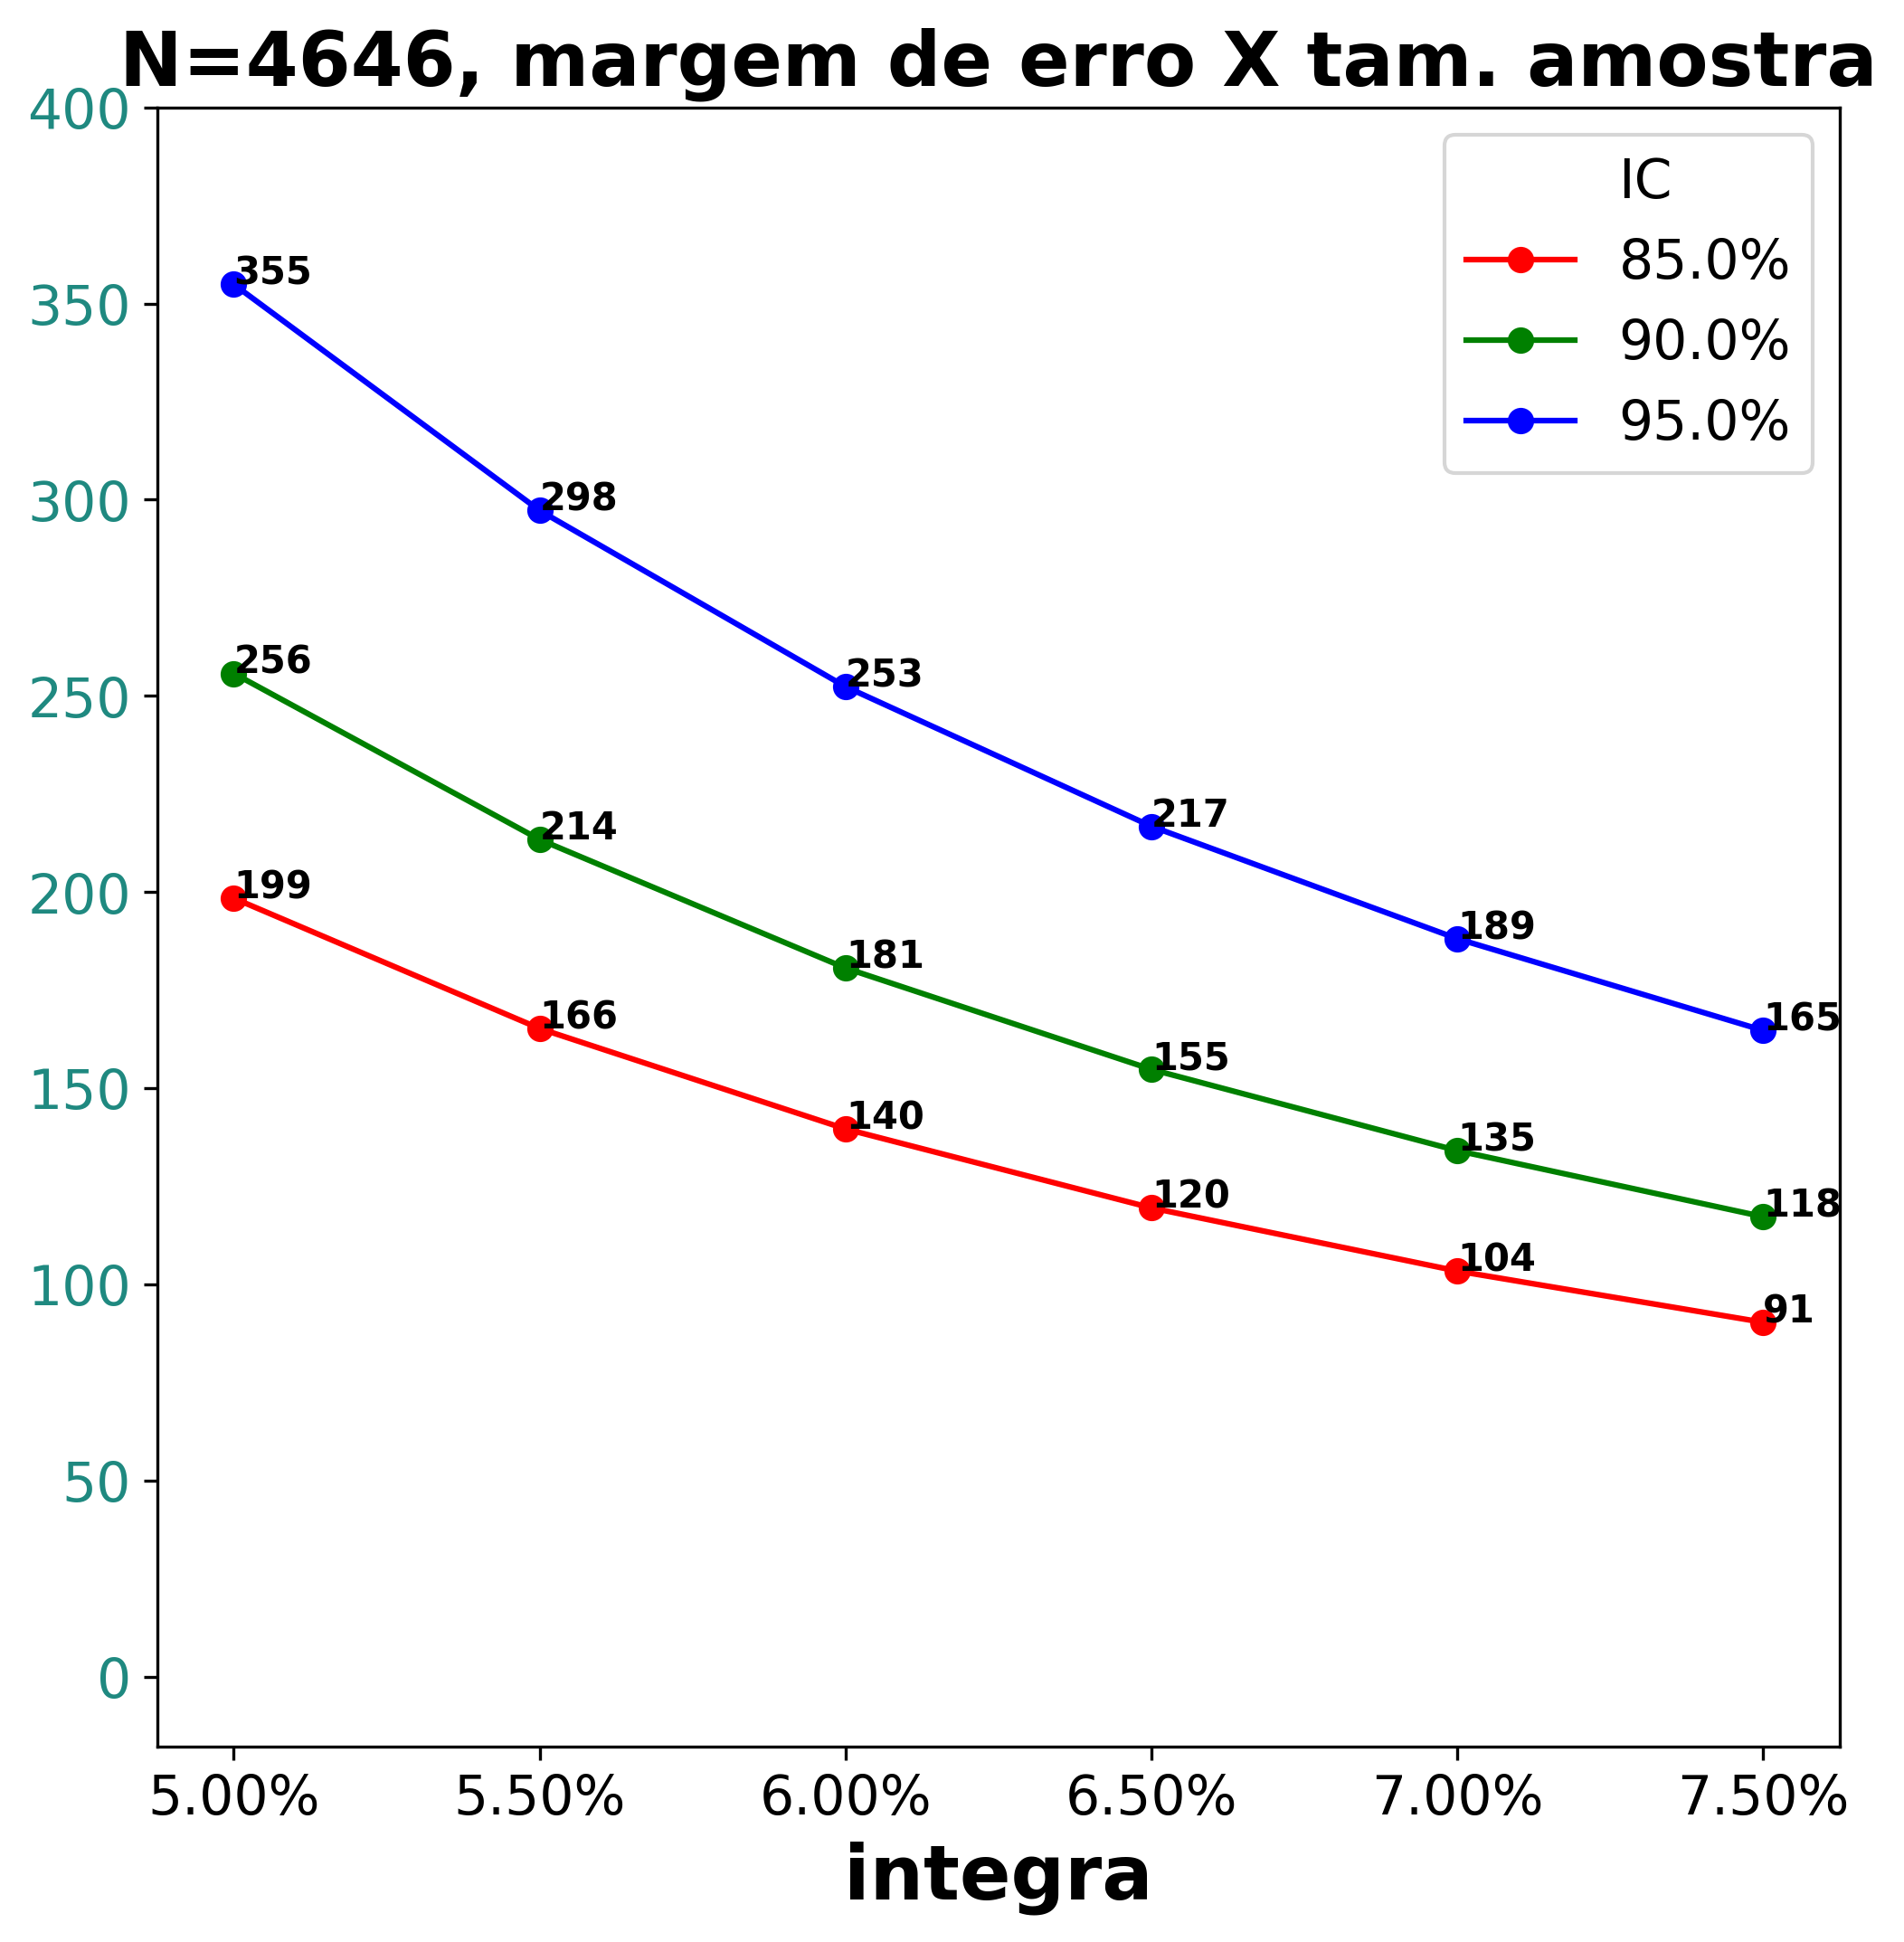

'integra.png'

In [25]:
err_lis = np.linspace(.05, .075, 6)
conf_lis = np.linspace(.85, .95, 3)
print(err_lis, conf_lis, sep='\n')

def myplot(n=INTEGRA, err_lis=err_lis, conf_lis=conf_lis, xlabel='integra'):
    fig, axs = plt.subplots(figsize=(8, 8), dpi=300)

    # common 'hack'
    # https://stackoverflow.com/questions/16826711/is-it-possible-to-add
    # -a-string-as-a-legend-item-in-matplotlib

    x = [err_lis.min()] * 6
    y = [0] * 6
    axs.plot(x, y, color='white')

    colors = 'rgb'
    x = err_lis

    for idx in range(len(conf_lis)):
        y = [ca3(conf_lis[idx], .5, err, n) for err in err_lis]
        axs.plot(
            x,
            y,
            marker='o',
            color=colors[idx],
#             label=f'adasdas'
        )
        for i, j in zip(x, y):
            axs.annotate(str(math.ceil(j)), xy=(i,j), fontweight='bold')

    title_dict = {'fontweight': 'bold', 'fontsize': 20}


    # axs.setjticks(np.linspace(0, 400, 9), fontsize='xx-large')
    plt.yticks(np.linspace(0, 400, 9), fontsize='x-large')
    plt.xticks(err_lis, fontsize='x-large')

    axs.tick_params(axis='y', labelcolor='#1f8980')
    axs.tick_params(axis='x', labelcolor='black')

    axs.set_title('N={}, margem de erro X tam. amostra'.format(n), fontdict=title_dict)
    axs.legend(
        ['IC']+[str(np.round(i, 2) * 100)+'%' for i in conf_lis], fontsize='x-large')

    axs.xaxis.set_major_formatter(mtick.PercentFormatter(1))
    axs.set_xlabel(xlabel, fontdict=title_dict)
    fname = '{}.png'.format(xlabel)
    plt.savefig(fname)
    print("Fig saved at >>> {}".format(fname))
    plt.show()
    return fname

myplot()

Fig saved at >>> extra.png


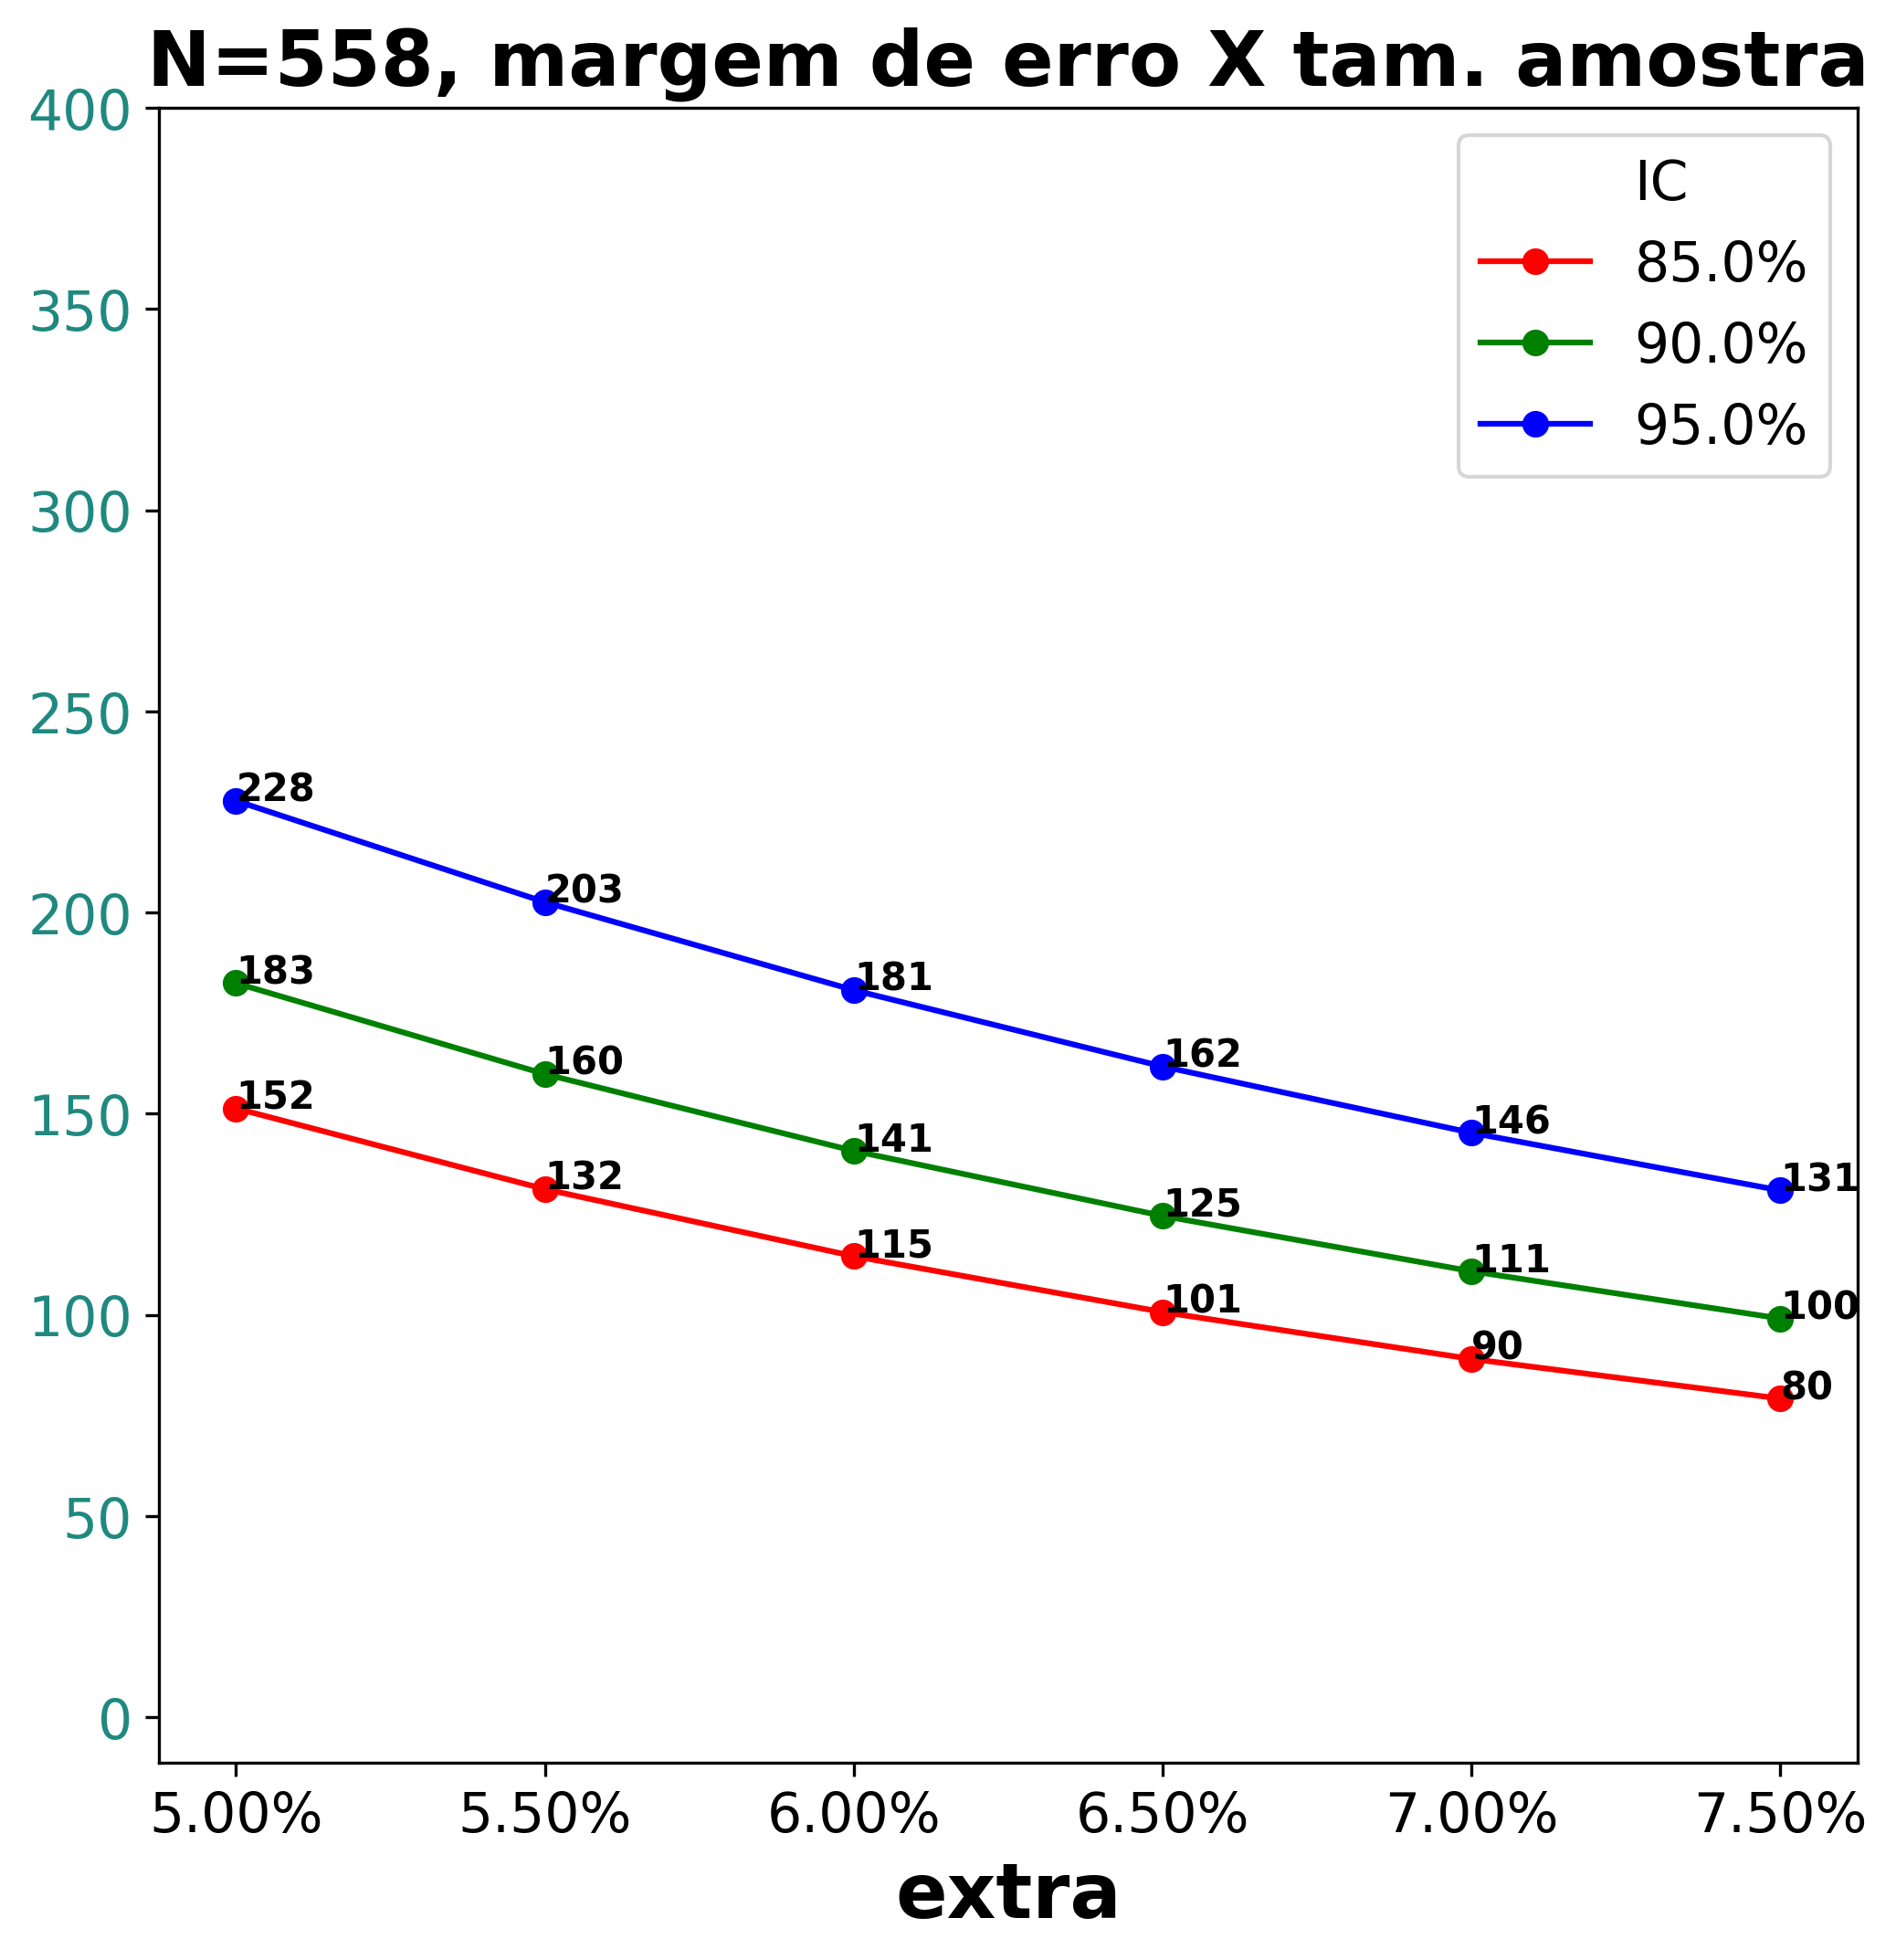

'extra.png'

In [26]:
myplot(n=contador['extra'], xlabel='extra')

Fig saved at >>> suplemento.png


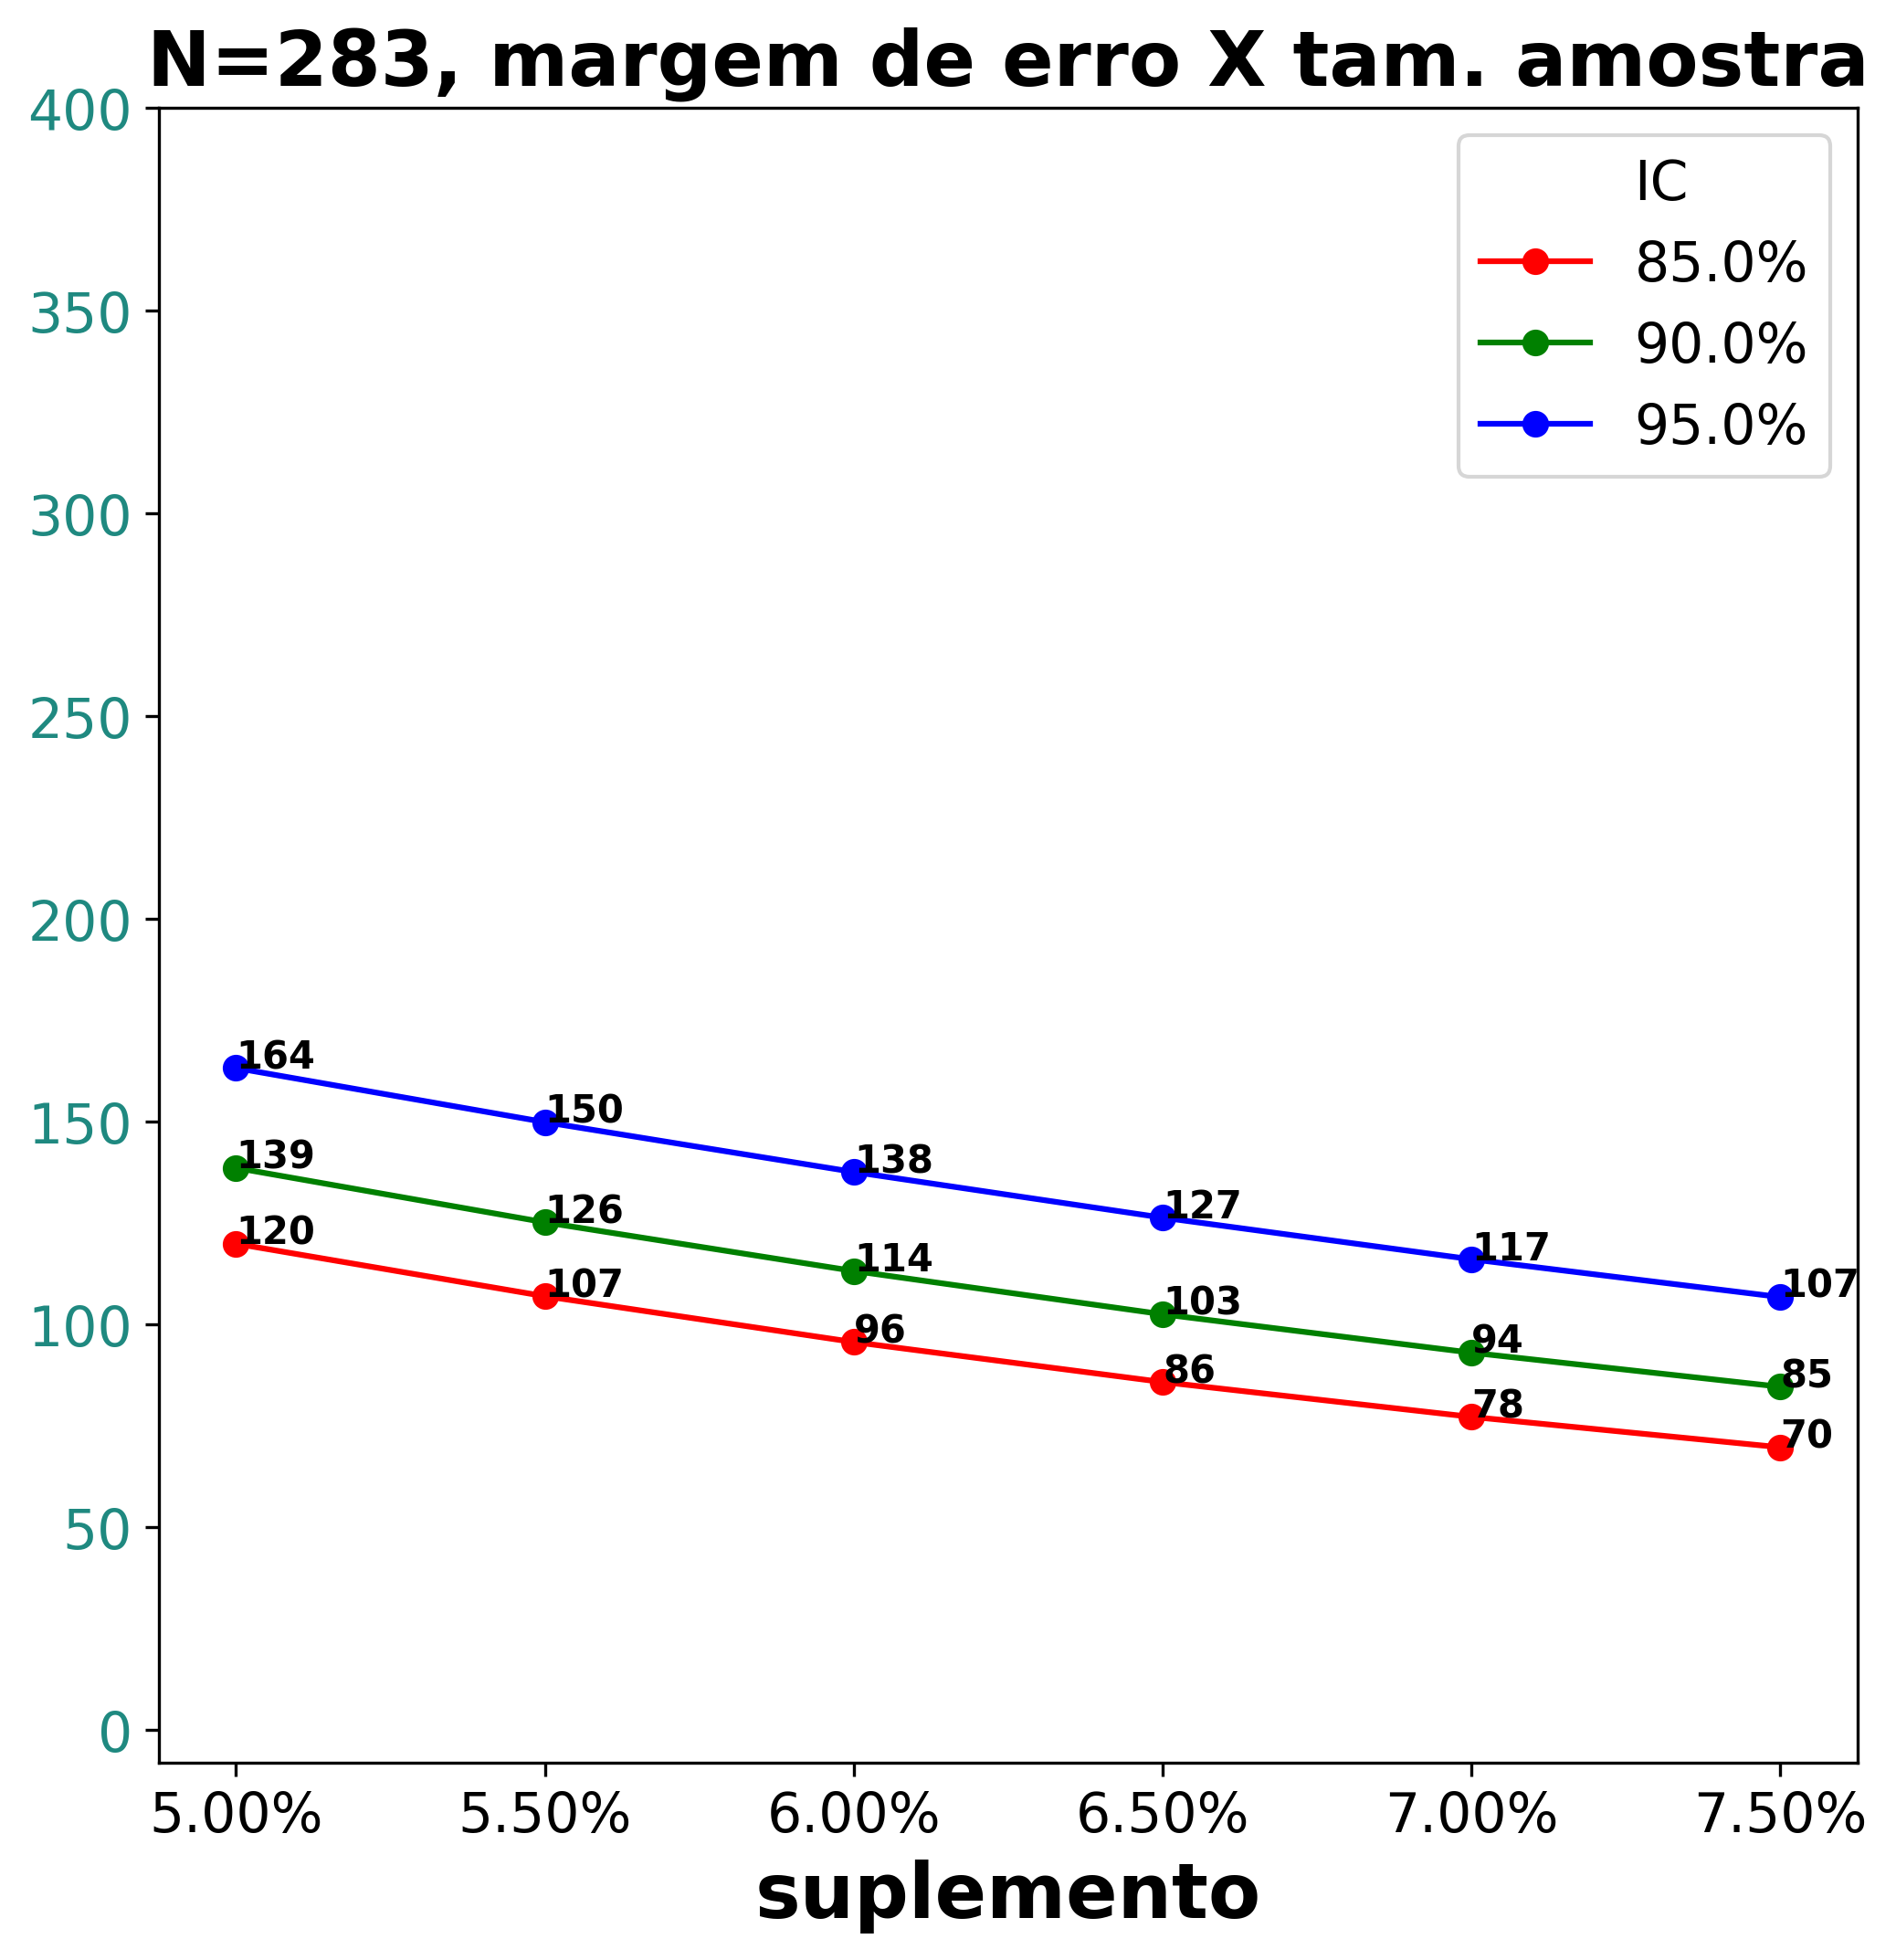

'suplemento.png'

In [27]:
myplot(n=contador['suplemento'], xlabel='suplemento')

Fig saved at >>> esp.png


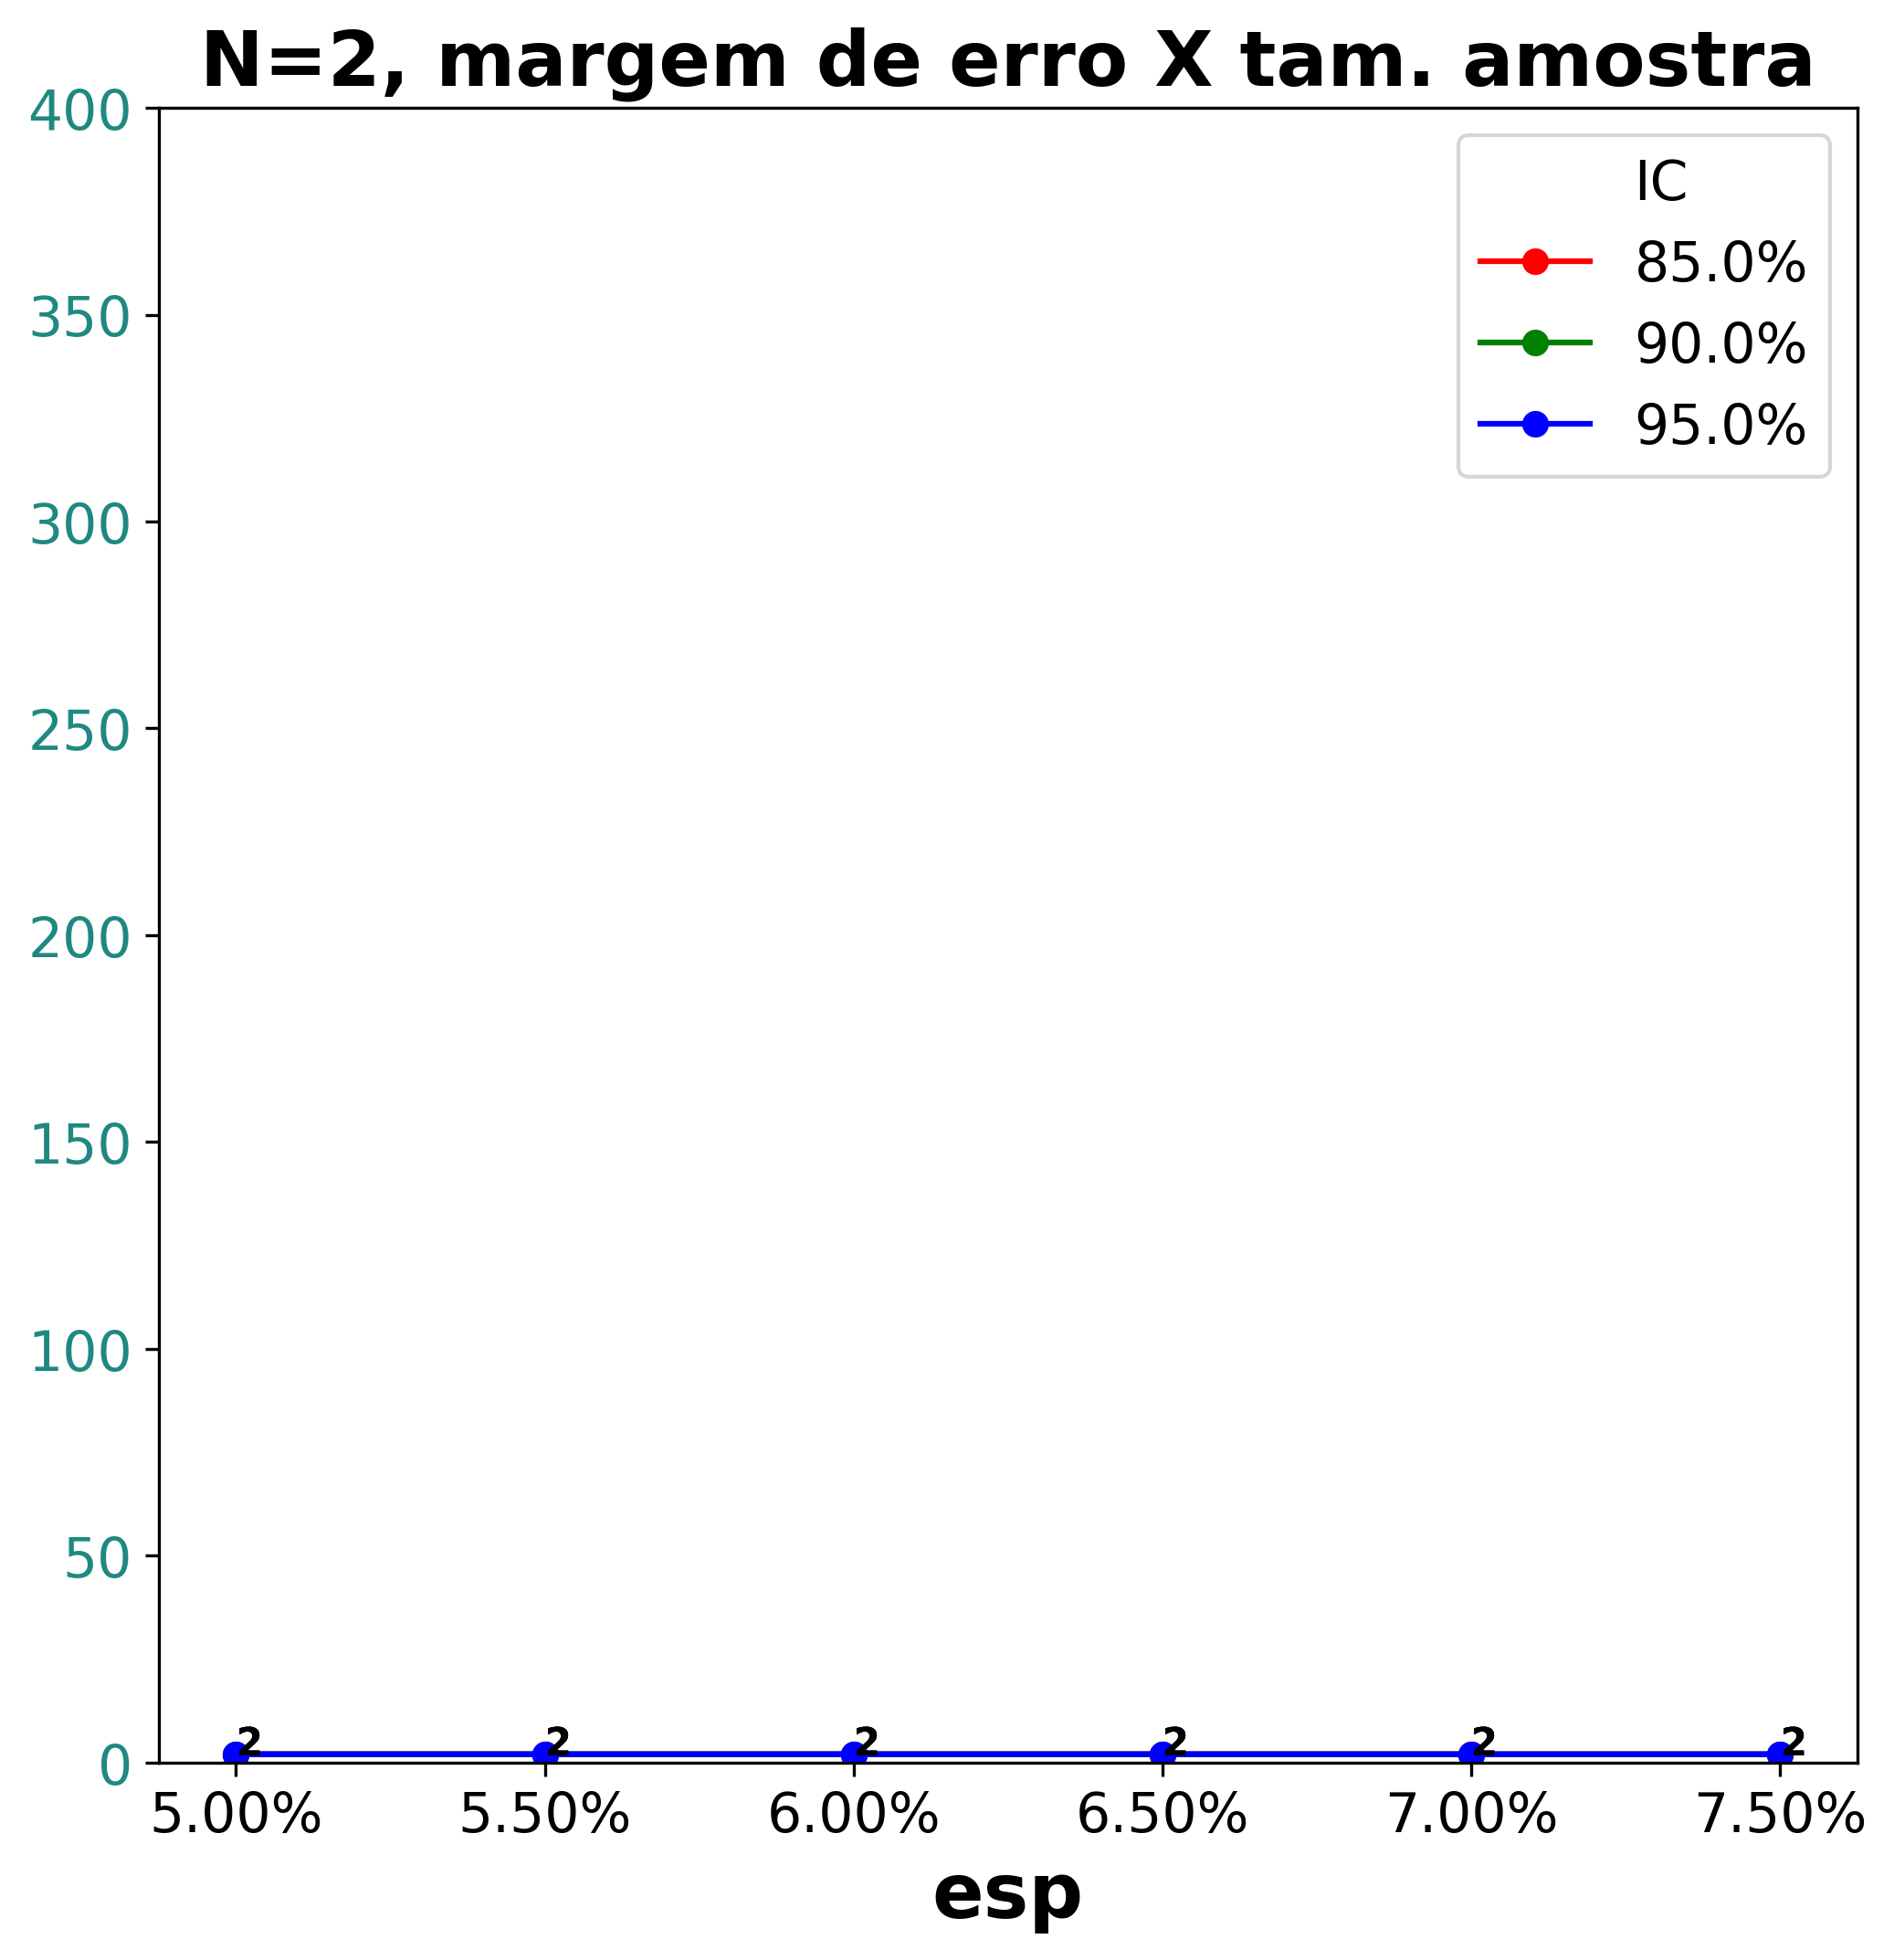

'esp.png'

In [28]:
myplot(n=contador['especial'], xlabel='esp')